### PSTH plot on water response

In [1]:
%matplotlib inline

In [2]:
import os;
os.chdir('/home/gergely/code/analysis/analysis-scripts/')
import sys;
import copy;

import cPickle as pickle;

import pandas as pd;

import numpy as np;
import scipy.stats as stats;

import matplotlib;
matplotlib.use("pdf");
matplotlib.style.use('classic')


import matplotlib.pyplot as pp;
import matplotlib.backends.backend_pdf as pdf;
import matplotlib.gridspec as gs;

import seaborn as sns;

import lab;
import lab.analysis.imaging_analysis as ia;
import lab.analysis.behavior_analysis as ba;
import lab.analysis.reward_analysis as ra;

import lab.classes.exceptions as exc;

import lab.plotting.plotting_helpers as plotTools;

import VIP_common as vc;
matplotlib.rcParams['pdf.fonttype'] = 42;
matplotlib.rcParams['ps.fonttype'] = 42;

/home/gergely/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gergely/anaconda2/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/gergely/code/analysis/lab/misc/lfp_helpers.py:16: UserWarning: rhd package not found, lab.misc.lfp_helpers.py will not work
  warnings.warn("rhd package not found, lab.misc.lfp_helpers.py will not work")


In [118]:
expSet=lab.ExperimentSet("raphe.sql");
mouseIDs=["gtr6_a3","gtr6_a4","gtr6_a5","gtr6_b1","gtr6_b2","gtr6_b3"];

In [119]:
hrExpGroups=vc.loadHRExpGrp(expSet, mouseIDs, minLicks=10);
# rfExpGroups=vc.loadExptsByType(expSet, mouseIDs, "randomForaging", channel="Ch2");
# rtExpGroups=vc.loadExptsByType(expSet, mouseIDs, "runTraining", channel="Ch2");
# ctxExpGroups=vc.loadExptsByType(expSet, mouseIDs, "contextDiscrimination", channel="Ch2")

In [120]:
imExpGroup=list(hrExpGroups["imaging"]);
# imExpGroup.extend(list(ctxExpGroups["imaging"]))
# imExpGroup.extend(list(rfExpGroups["imaging"]));
# imExpGroup.extend(list(rfExpGroups["imaging"]));
# imExpGroup.extend(list(orfExpGroups["imaging"]));
imExpGroup=lab.classes.ExperimentGroup(imExpGroup);

In [121]:
len(imExpGroup)

69

In [75]:
# prints out all of the belt names
for exp in imExpGroup:
    print(exp.get("belt"))

stripe02m
stripe02m
stripe02m
stripe02m
stripe02m
gergo07
stripe02m
gergo07
stripe02m
gergo07
stripe02m
gergo07
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05
gergo05


In [76]:
# you don't really need this, the position can be plugged in directly to the cell below 
# posResponse = vc.getData(imExpGroup, "position_50") 

In [83]:
print(len(imExpGroup))
print(posPSTH.columns)
print(posPSTH.size)
posPSTH.head(2)

81
Index([u'ROI', u'activity', u'expt', u'stimStart', u'stimulus', u'time'], dtype='object')
52800


,ROI,activity,expt,stimStart,stimulus,time
0,"([[< Trial: gtr6_b2, stimulus = , time = 2018...","[-0.0446394631479, -0.0509716752593, -0.045470...",[[]],760,position_50,"[-4.968554, -4.935208, -4.901862, -4.868516, -..."
1,"([[< Trial: gtr6_b2, stimulus = , time = 2018...","[-0.00959696437459, -0.0165492674266, -0.02051...",[[]],3561,position_50,"[-4.968554, -4.935208, -4.901862, -4.868516, -..."


In [131]:
position = "position_15"
posPSTH = lab.analysis.imaging_analysis.PSTH(imExpGroup, position, return_df=True)
posPSTH["mouseID"]=map(lambda expt: expt.parent.get("mouseID"), posPSTH["expt"])
posPSTH["cROI"]=map(lambda roi: (roi[0].get("mouseID"), roi[1], roi[2]), posPSTH["ROI"])
posPSTHgrouped = posPSTH.groupby(["mouseID", "cROI"]).apply(vc.aggregratePSTH, "activity", "time")

In [87]:
print(posPSTHgrouped.columns)
#print(psth.index)
print(len(posPSTHgrouped))
# print(type(psth))
posPSTHgrouped.head(2)

Index([u'activityMean', u'activitySTD', u'numSamples', u'time'], dtype='object')
729


activityMean  \
mouseID cROI                                                                              
gtr6_a1 (gtr6_a1, , 1540946742427) 0  [0.0314761663095, 0.0270260028066, 0.023029950...   
        (gtr6_a1, , 1540946755275) 0  [0.0242681655258, 0.0176266804066, 0.017732620...   

                                                                            activitySTD  \
mouseID cROI                                                                              
gtr6_a1 (gtr6_a1, , 1540946742427) 0  [0.0268177739684, 0.0221214308663, 0.026582771...   
        (gtr6_a1, , 1540946755275) 0  [0.0567883391951, 0.0576304349971, 0.057170617...   

                                      numSamples  \
mouseID cROI                                       
gtr6_a1 (gtr6_a1, , 1540946742427) 0          10   
        (gtr6_a1, , 1540946755275) 0          10   

                                                                                   time  
mouseID cROI                                                                             
gtr6_a1 (gtr6_a1, , 1540946742427) 0  [-4.9827, -4.949482, -4.916264, -4.883046, -4....  
        (gtr6_a1, , 1540946755275) 0  [-4.9827, -4.949482, -4.916264, -4.883046, -4....

In [46]:
# template to plot and save the mouse individually: 

# pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_a1_allPSTH.pdf")
# gtr6_b3 = psth.loc["gtr6_b3"]
# fig=pp.figure(dpi=300)
# for time, trace in zip(gtr6_a1["time"],gtr6_a1["activityMean"]):
#     pp.plot(time, trace)
# pages.savefig(fig)
# pp.close(fig)
# pages.close()

In [121]:
# uncomment these lines if you want to have the plots with black bckground

# import matplotlib.style
# matplotlib.style.use('dark_background')

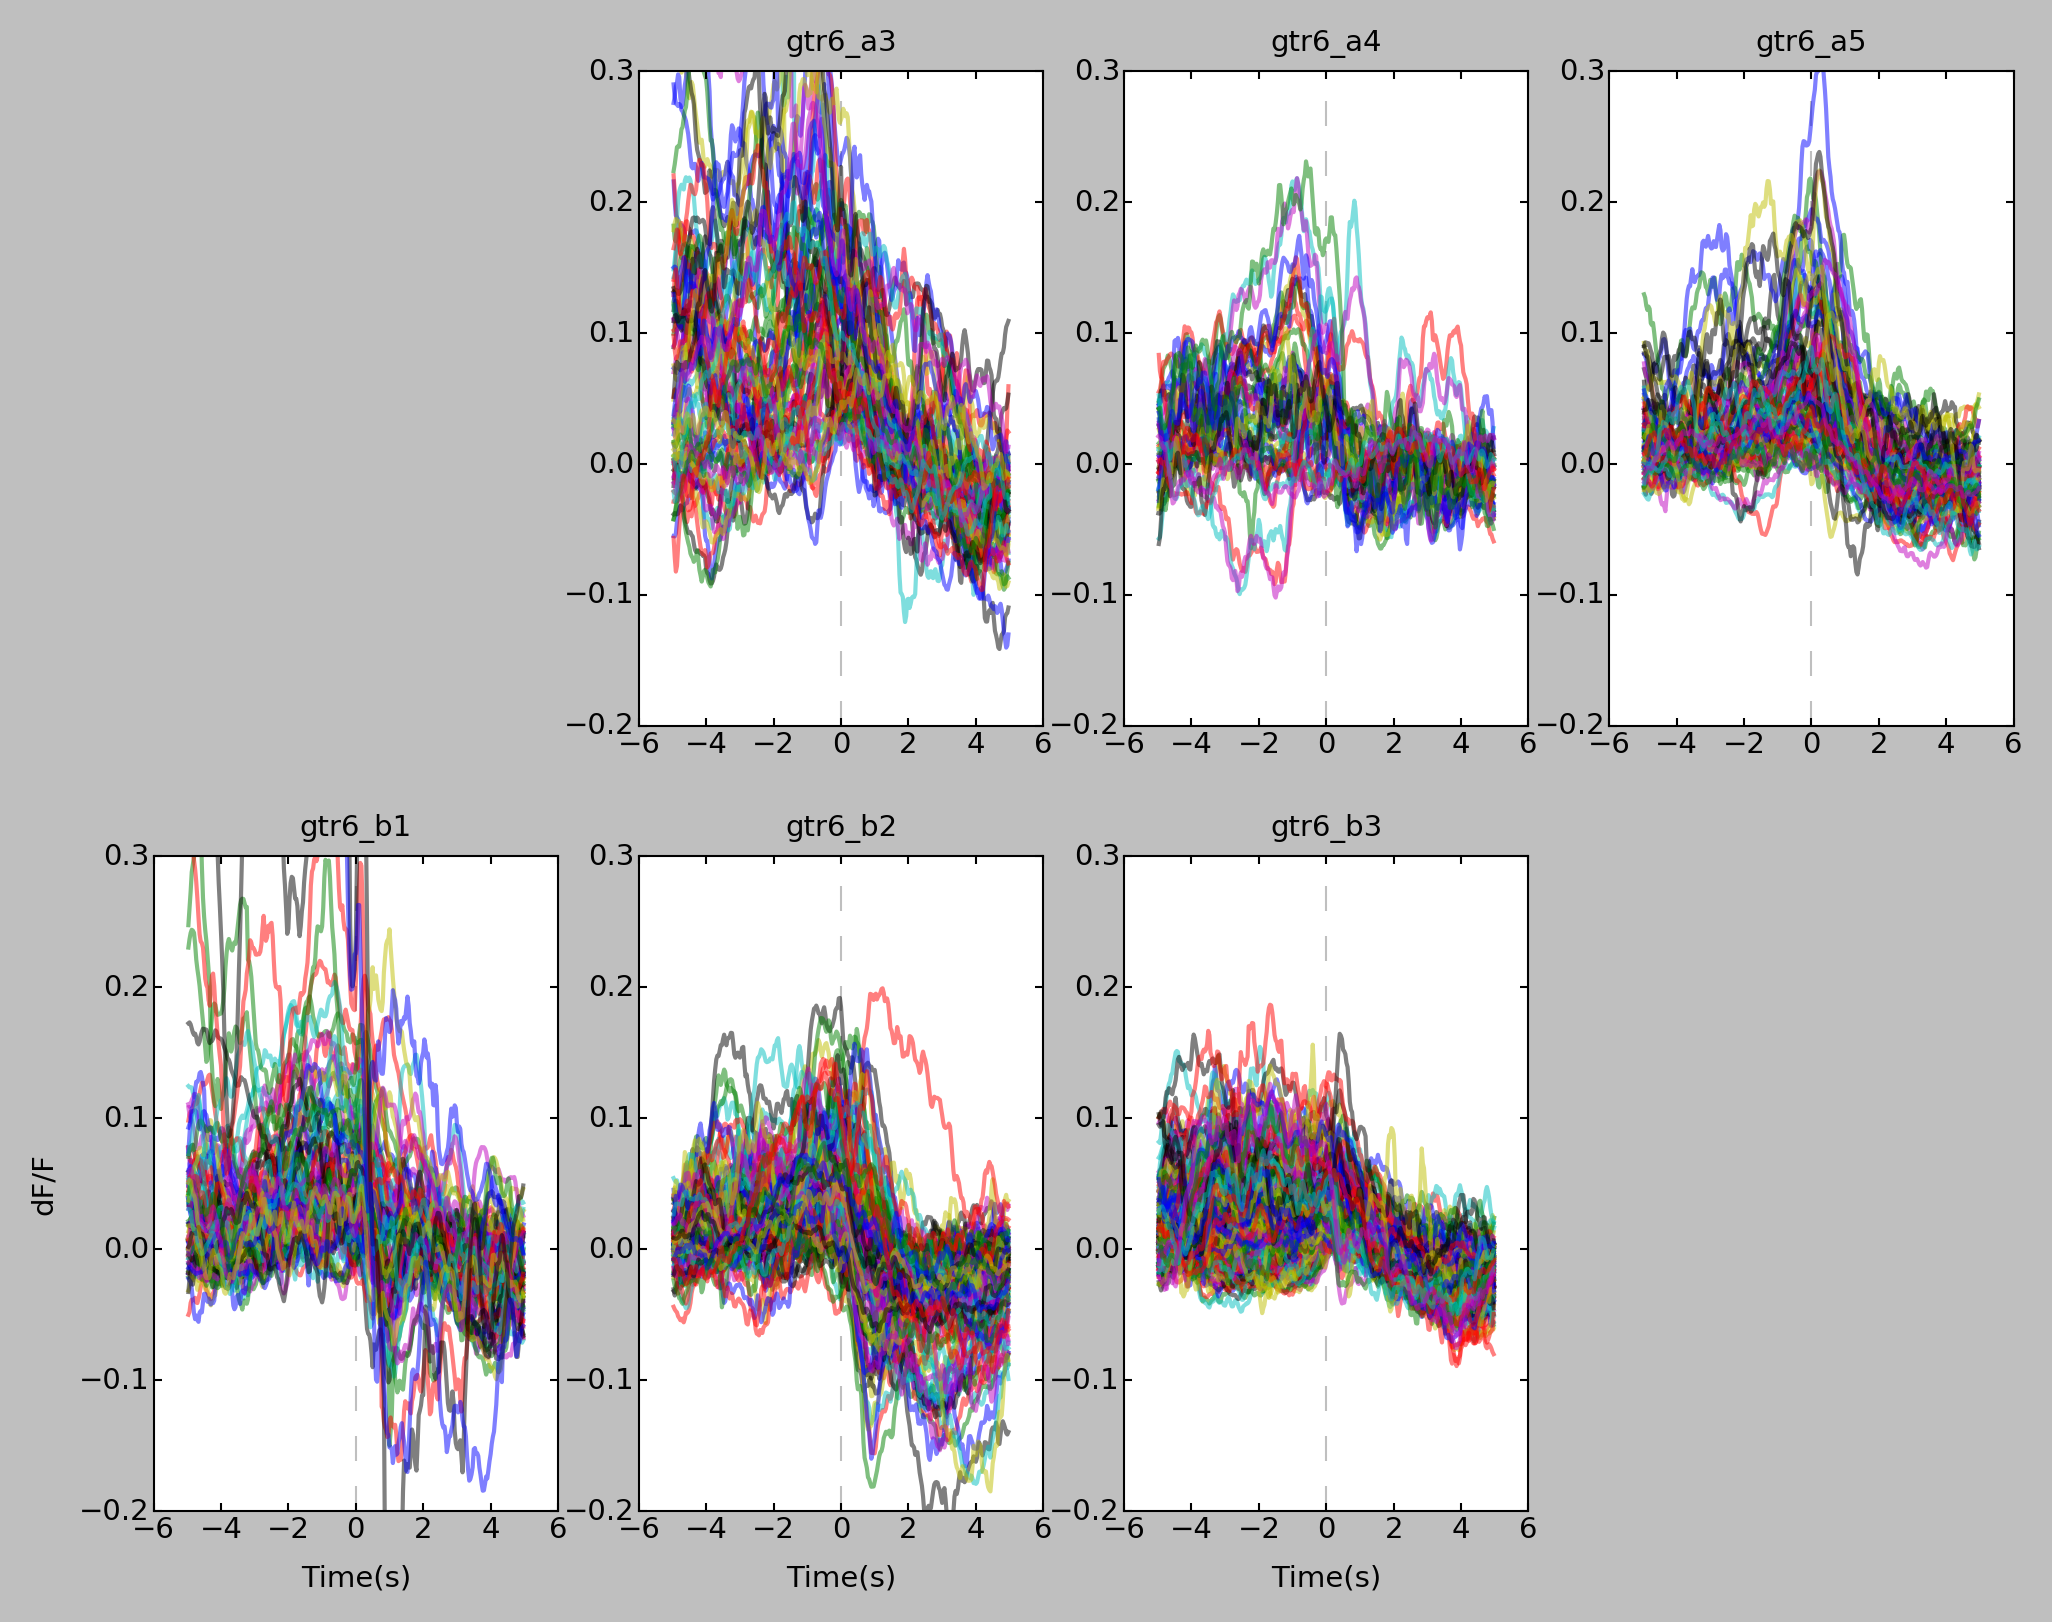

In [132]:
# pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_cohort_PSTHs_position_50.pdf")
figure1 = pp.figure(dpi=300)

# pp.subplot(241)
# pp.ylim(-0.2, 0.3)
# pp.ylabel("dF/F")
# pp.title("gtr6_a1")
# pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
# for time, trace in zip(posPSTHgrouped.loc["gtr6_a1"]["time"],posPSTHgrouped.loc["gtr6_a1"]["activityMean"]):
#     pp.plot(time, trace, alpha=0.5)
        
pp.subplot(242)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.ylim(-0.2, 0.3)
pp.title("gtr6_a3")
for time, trace in zip(posPSTHgrouped.loc["gtr6_a3"]["time"],posPSTHgrouped.loc["gtr6_a3"]["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    
pp.subplot(243)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.ylim(-0.2, 0.3)
pp.title("gtr6_a4")
for time, trace in zip(posPSTHgrouped.loc["gtr6_a4"]["time"],posPSTHgrouped.loc["gtr6_a4"]["activityMean"]):
    pp.plot(time, trace, alpha=0.5)

pp.subplot(244)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.title("gtr6_a5");
pp.ylim(-0.2, 0.3)
for time, trace in zip(posPSTHgrouped.loc["gtr6_a5"]["time"],posPSTHgrouped.loc["gtr6_a5"]["activityMean"]):
    pp.plot(time, trace, alpha=0.5)


pp.subplot(245)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.ylim(-0.2, 0.3)
pp.ylabel("dF/F")
pp.xlabel("Time(s)")
pp.title("gtr6_b1");
for time, trace in zip(posPSTHgrouped.loc["gtr6_b1"]["time"],posPSTHgrouped.loc["gtr6_b1"]["activityMean"]):
    pp.plot(time, trace, alpha=0.5)


pp.subplot(246)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.xlabel("Time(s)")
pp.title("gtr6_b2");
pp.ylim(-0.2, 0.3)
for time, trace in zip(posPSTHgrouped.loc["gtr6_b2"]["time"],posPSTHgrouped.loc["gtr6_b2"]["activityMean"]):
    pp.plot(time, trace, alpha=0.5)

pp.subplot(247)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.xlabel("Time(s)")
pp.title("gtr6_b3");
pp.ylim(-0.2, 0.3)
for time, trace in zip(posPSTHgrouped.loc["gtr6_b3"]["time"],posPSTHgrouped.loc["gtr6_b3"]["activityMean"]):
    pp.plot(time, trace, alpha=0.5)

figure1.savefig("/data/gergely/Summaries/_raphe/position/gtr6_cohort_PSTHs_"+position+".pdf")    
# pages.savefig(figure1)
# pages.close()